In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.sandbox.distributions.genpareto import shape

plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 4)})

%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
sns.set()

In [103]:
df = pd.read_csv("supermarket_sales.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
 9   Total          1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment        1000 non-null   object 
 13  Rating         1000 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 109.5+ KB


#### Question 1: Example

In [104]:
### how many purchases (rows in the table, not 'Quantity') were done by Male and Female customers?

#### Question 1 - solution: Example

In [105]:
m_amount = len(df[df['Gender'] == 'Male'])
f_amount = len(df[df['Gender'] == 'Female'])

# do not print any intermediate results
# print *only your final* result in the form of a data frame (for clarity)

result = [('purchases by male', m_amount), ('purchases by female', f_amount)]
pd.DataFrame(result)

,0,1
0,purchases by male,498
1,purchases by female,502


#### Question 2

In [106]:
### what is the average Rating for products in the "Home and lifestyle" Product line?

#### Question 2 - solution 

In [107]:
print("testing123")

testing123


#### Question 3

In [108]:
### how many products in each Product line were sold during the first week (days 1-7 including) of February 2019?
### use the 'Quantity' column for that purpose - the number of products purchased

#### Question 3 - solution

In [138]:
wanted_dates = {
    "02/01/2019", "02/02/2019", "02/03/2019",
    "02/04/2019", "02/05/2019", "02/06/2019", "02/07/2019"
}
df_in_dates = df[df['Date'].apply(lambda x: x in wanted_dates)]
filtered_sales_in_date = df_in_dates.groupby('Product line')["Quantity"].sum().reset_index()
all_product_lines = pd.DataFrame(df['Product line'].unique(), columns=['Product line'])
all_sales_in_dates = pd.merge(left = all_product_lines,right = filtered_sales_in_date, on='Product line', how= 'left')
pd.DataFrame(all_sales_in_dates)


,Product line,Quantity
0,Electronic accessories,92
1,Fashion accessories,67
2,Food and beverages,132
3,Health and beauty,78
4,Home and lifestyle,87
5,Sports and travel,54


#### Question 4

In [110]:
### plot a bar chart showing the number of products per category computed in the previous question

#### Question 5

In [111]:
### plot the same bar chart as above - split by gender (male, female)
### the split bar chart is called stacked bar: look up "plot stacked bar charts from a dataframe" to see how to plot it

#### Question 5 - solution

Text(0, 0.5, 'Quantity sold')

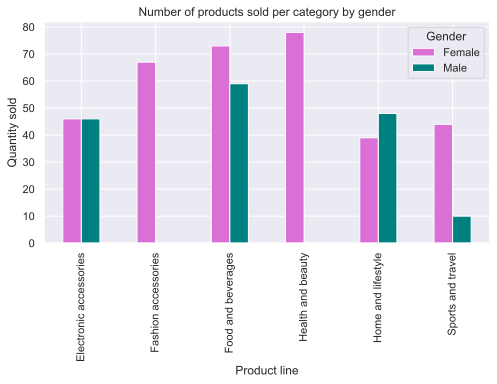

In [112]:
gender_and_product_line = df_in_dates.groupby(['Gender', 'Product line'])["Quantity"].sum().reset_index()
gender_and_product_line_all_options = pd.DataFrame([(x, y) for x in df['Product line'].unique() for y in df['Gender'].unique()],
                                columns=['Product line', 'Gender'])
gender_and_product_line_final = pd.merge(left = gender_and_product_line_all_options, right = gender_and_product_line, on=['Product line', 'Gender'], how='left')
gender_and_product_line_final.fillna(0, inplace = True)
pivot_data = gender_and_product_line_final.pivot(index='Product line', columns='Gender', values='Quantity')
pivot_data.plot(kind='bar',color=['#DA70D6', 'teal'])
plt.title('Number of products sold per category by gender')
plt.ylabel("Quantity sold")


#### Question 6

In [113]:
### what is the total sales ('Total') done by each Payment type during the whole period?
### use the full data in the dataset (not the first week of March) from now on

#### Question 7

In [114]:
### plot a chart with total sales ('Total') of the "Sports and travel" products by calendar week (Monday-Sunday): 
### note the first and the last week can be incomplete (for instance, the data starts on Wednesday, and ends on Friday)
### assume all our sales data spans the same year (for instance, 2019)

### you can make use of the isocalendar() function: https://www.geeksforgeeks.org/isocalendar-function-of-datetime-date-class-in-python/

### x axis are weeks enumerated from the first to the last calendar week in the data
### y axis is the total sales that week

#### Question 7 - solution

In [142]:
from datetime import date
def get_num_of_week(st_date:str) -> int:
    date = pd.to_datetime(st_date,format='%m/%d/%Y')
    year,week_num,weekday = date.isocalendar()
    return week_num


sport_and_travel_sales = df[df['Product line'] == 'Sports and travel'].copy()
sport_and_travel_sales['week_day'] = sport_and_travel_sales['Date'].apply(get_num_of_week)
res = sport_and_travel_sales.groupby('week_day')['Total'].sum()
pd.DataFrame(res)

,Total
week_day,
1,2266.8345
2,5622.2565
3,5966.8560
4,4761.8655
5,5554.9410
6,3200.0325
7,3884.9790
8,2767.6110
9,3013.2270


#### Question 8

In [115]:
### plot a line chart of total sales ('Total') per hour in our dataset
### the x axis will be an hour (e.g., 9, 10, 11), and the y axis will be the total amout of sales during that hour
### (e.g., for 9 - all sales between 09:00 and 10:00)

#### Question 9

In [116]:
### plot a line chart of the total number of purchases (rows) per hour in our dataset
### the x axis will be an hour (e.g., 9, 10, 11), and the y axis will be the total number of purchases during that hour
### (e.g., for 9 - all sales between 09:00 and 10:00)

#### Question 9 - solution

In [156]:
from datetime import datetime

#hour = datetime.strptime(hour_in_str, '%H:%M').hour
#print(hour)
df_copy = df.copy()
df_copy['hour'] = df_copy['Time'].apply(lambda x: datetime.strptime(x, '%H:%M').hour)
res = df_copy.groupby('hour')
hours_and_purchases = []
for hour, group in res:
    hours_and_purchases.append((hour, group.shape[0]))
pd.DataFrame(hours_and_purchases,columns=['hour','purchases'])


,hour,purchases
0,10,101
1,11,90
2,12,89
3,13,103
4,14,83
5,15,102
6,16,77
7,17,74
8,18,93
9,19,113


#### Question 10

In [117]:
### what is the total income of strategic products by City?

### for each non-strategic product (as detailed in the product_types_strategy.csv file), 
###    display break down of total sales by cities - a table with three columns: 
###    (1) product line, (2) city and (3) total sales (the "Total" column) for that line in the city